In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

In [56]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       2447 non-null   object 
 1   Title              2447 non-null   object 
 2   Overview           2447 non-null   object 
 3   Popularity         2447 non-null   float64
 4   Vote_Count         2447 non-null   int64  
 5   Vote_Average       2447 non-null   float64
 6   Original_Language  2447 non-null   object 
 7   Genre              2447 non-null   object 
 8   Poster_Url         2447 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 172.2+ KB


In [58]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [59]:
df.duplicated().sum()

0

In [60]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,2447.000000,2447.000000,2447.000000
mean,101.913947,3146.480180,6.625868
std,206.080884,4313.779159,1.102282
min,35.266000,0.000000,0.000000
25%,43.347500,227.000000,6.100000
50%,57.705000,1298.000000,6.700000
75%,92.618000,4559.000000,7.300000
max,5083.954000,31077.000000,9.100000


Exploration Summary :

1.We have a dataframe consisting of 2447 rows and 9 columns.
2.Our dataset looks a bit tidy with no naNS nor duplicated values.
3.Release_Date column needs to be casted into date time and to extract only the year value.
4.Overview, Original_Languege and Poster-Uri wouldn't be so useful during analysis, so we'll drop them.
5.There is noticable outliers in Popularity column
6.Vote_Average bettter be categorised for proper analysis.
7.Genre column has Comma saperated values and white spaces that needs to be handled and casted into Category. Exploration Summary


In [61]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])


In [62]:
df['Release_Date'] = df['Release_Date'].dt.year

In [63]:
df['Release_Date'].dtypes

dtype('int32')

In [64]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping Columns which are not necessary


In [65]:
cols = ['Overview','Original_Language','Poster_Url']

In [66]:
df.drop(cols , axis = 1, inplace= True)

In [67]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Categorizing Vote_Average column :

We would cut the Vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function provided above.


In [68]:
def catigorize_col(df, col, labels):
    edges =[ df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges,labels = labels, duplicates='drop')
    return df






In [69]:
labels = ['Not Popular' , 'Below Avg', 'Avg','Popular']
catigorize_col(df,'Vote_Average', labels)

df['Vote_Average'].unique()

['Popular', 'Below Avg', 'Avg', 'Not Popular', NaN]
Categories (4, object): ['Not Popular' < 'Below Avg' < 'Avg' < 'Popular']

In [70]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Avg,"Action, Adventure, Thriller, War"


In [71]:
df['Vote_Average'].value_counts()

Vote_Average
Not Popular    622
Below Avg      621
Avg            601
Popular        581
Name: count, dtype: int64

In [72]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

we'd split genres into a list and then explode our dataframe to have only one
enre er row for ezch movie

In [74]:
df['Genre']= df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


Casting column into category

In [79]:
df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6713 entries, 0 to 6712
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  6713 non-null   int32   
 1   Title         6713 non-null   object  
 2   Popularity    6713 non-null   float64 
 3   Vote_Count    6713 non-null   int64   
 4   Vote_Average  6713 non-null   category
 5   Genre         6713 non-null   category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 197.7+ KB


In [83]:
df.nunique()

Release_Date      74
Title           2378
Popularity      2379
Vote_Count      1835
Vote_Average       4
Genre             19
dtype: int64

In [ ]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


Data Visualisation

In [85]:
sns.set_style('whitegrid')

What is the most frequent genre of movies released on Netflix?

In [86]:
df['Genre'].describe()

count       6713
unique        19
top       Action
freq         857
Name: Genre, dtype: object

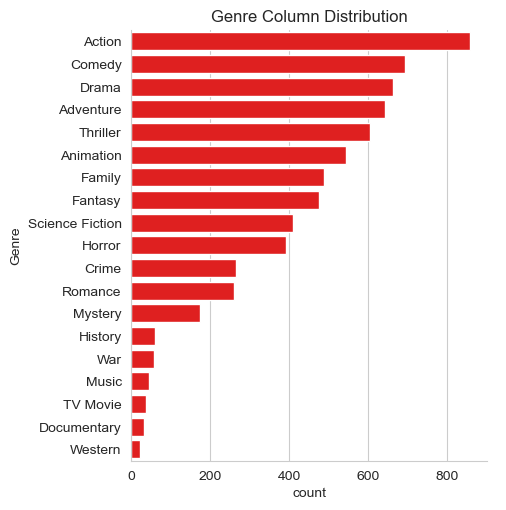

In [88]:
sns.catplot( y = 'Genre', data = df , kind = 'count', order = df['Genre'].value_counts().index,color= '#ff0000')
plt.title ('Genre Column Distribution')
plt.show()

Which has highest votes in vote avg column?

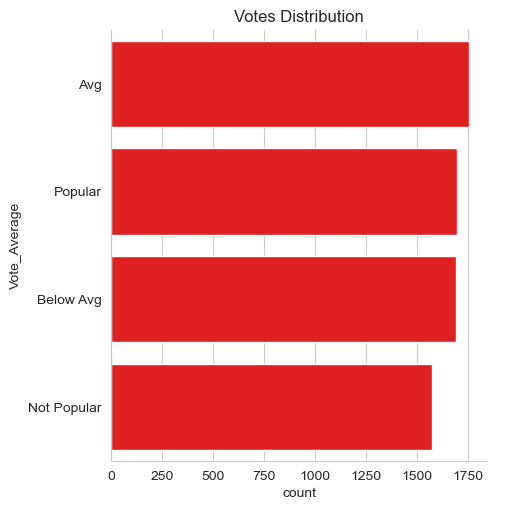

In [90]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count', order = df['Vote_Average'].value_counts().index,color= '#ff0000')
plt.title ('Votes Distribution')
plt.show()

what movie got the highest popularity? what is its genre?

In [91]:
df[df['Popularity'] ==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


what movie got the lowest popularity? what is its genre?

In [92]:
df[df['Popularity'] ==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
6709,1991,An American Tail: Fievel Goes West,35.266,588,Below Avg,Adventure
6710,1991,An American Tail: Fievel Goes West,35.266,588,Below Avg,Animation
6711,1991,An American Tail: Fievel Goes West,35.266,588,Below Avg,Family
6712,1991,An American Tail: Fievel Goes West,35.266,588,Below Avg,Western


which year has the most filmed movies?

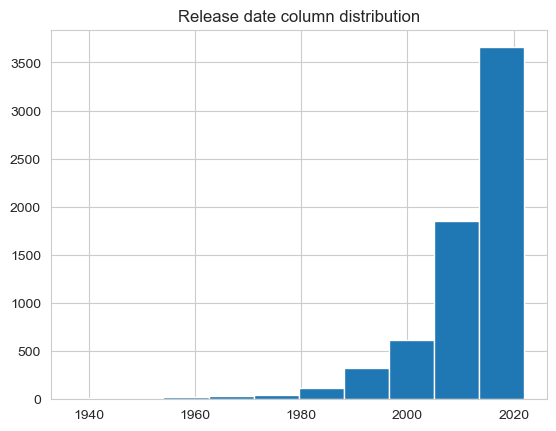

In [93]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()

Conclusion
QI : What is the most frequent genre in the dataset?
Action genre is the most frequent genre in our dataset among 19 other genres.


Q2: What genres has highest votes?
we have  Average datasets with maximum vote.

Q3: What movie got the highest popularity? what's its genre?
Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action, Adventure and Science Fiction.

Q3: What movie got the lowest popularity? what is its genre?
An American Tail: Fievel Goes West has the highest lowest rate in our dataset and it has genres of Animation, Adventure and Family and Western.

Q4: Which year has the most filmed movies
year 2020 has the highest filrning rate in our dataset.